In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn 
import os
import sys
import time

from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [2]:
print(tf.__version__)

2.0.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

In [7]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)



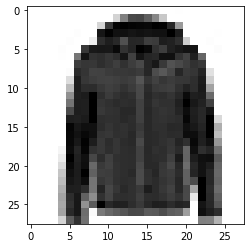

In [8]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show()

show_single_image(x_train[0])

In [9]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row +col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap='binary',interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_name = ['T-shirt','Trouser','p','d','c','s','shirt','sneaker','b','a']


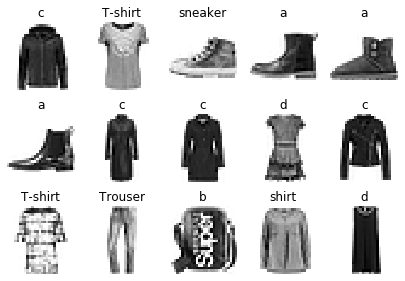

In [10]:
show_imgs(3,5,x_train,y_train,class_name)

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = 'relu'))
model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd', metrics = ['accuracy'])


In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.5265 - accuracy: 0.8164 - val_loss: 0.4193 - val_accuracy: 0.8536
Epoch 2/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3875 - accuracy: 0.8614 - val_loss: 0.3769 - val_accuracy: 0.8678
Epoch 3/10
55000/55000 [==============================] - 5s 86us/sample - loss: 0.3514 - accuracy: 0.8730 - val_loss: 0.3491 - val_accuracy: 0.8770
Epoch 4/10
55000/55000 [==============================] - 4s 80us/sample - loss: 0.3262 - accuracy: 0.8819 - val_loss: 0.3643 - val_accuracy: 0.8686
Epoch 5/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.3084 - accuracy: 0.8879 - val_loss: 0.3300 - val_accuracy: 0.8802
Epoch 6/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.2915 - accuracy: 0.8945 - val_loss: 0.3431 - val_accuracy: 0.8726
Epoch 7/10
55000/55000 [==============================]

In [15]:
type(history)

tensorflow.python.keras.callbacks.History

In [16]:
history.history

{'loss': [8939629956669389.0,
  2.3026913644617255,
  2.3026989631999624,
  2.3026954155661845,
  2.302693670203469,
  2.30268245752508,
  2.302697217213024,
  2.3026901454231954,
  2.3026943726626308,
  2.302693424883756],
 'accuracy': [0.10101818,
  0.09810909,
  0.098272726,
  0.0978,
  0.09823637,
  0.09974545,
  0.09781818,
  0.09676363,
  0.098527275,
  0.097381815],
 'val_loss': [2.3029430034637453,
  2.3030294666290283,
  2.3028156337738035,
  2.302934487915039,
  2.3027204216003416,
  2.3026147190093993,
  2.302652807235718,
  2.302773695373535,
  2.3027528705596922,
  2.302763207244873],
 'val_accuracy': [0.0986,
  0.0986,
  0.0986,
  0.0986,
  0.1008,
  0.0976,
  0.0976,
  0.0986,
  0.1012,
  0.1024]}

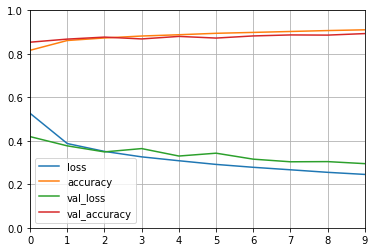

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [ ]:
model.evaluate(x_test_scaled,y_test)